<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mod-4-Project---Starter-Notebook" data-toc-modified-id="Mod-4-Project---Starter-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mod 4 Project - Starter Notebook</a></span></li><li><span><a href="#Some-Notes-Before-Starting" data-toc-modified-id="Some-Notes-Before-Starting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Some Notes Before Starting</a></span><ul class="toc-item"><li><span><a href="#Wide-Format-vs-Long-Format" data-toc-modified-id="Wide-Format-vs-Long-Format-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Wide Format vs Long Format</a></span></li></ul></li><li><span><a href="#Helper-Functions-Provided" data-toc-modified-id="Helper-Functions-Provided-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Helper Functions Provided</a></span></li><li><span><a href="#Step-1:-Load-the-Data/Filtering-for-Chosen-Zipcodes" data-toc-modified-id="Step-1:-Load-the-Data/Filtering-for-Chosen-Zipcodes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1: Load the Data/Filtering for Chosen Zipcodes</a></span><ul class="toc-item"><li><span><a href="#Upcoming-Real-Estate-Markets-to-Watch-in-2019" data-toc-modified-id="Upcoming-Real-Estate-Markets-to-Watch-in-2019-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Upcoming Real Estate Markets to Watch in 2019</a></span><ul class="toc-item"><li><span><a href="#San-Jose,-CA" data-toc-modified-id="San-Jose,-CA-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>San Jose, CA</a></span></li><li><span><a href="#Las-Vegas,-NV" data-toc-modified-id="Las-Vegas,-NV-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Las Vegas, NV</a></span></li></ul></li></ul></li><li><span><a href="#Hottest-Zipcodes" data-toc-modified-id="Hottest-Zipcodes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hottest Zipcodes</a></span></li><li><span><a href="#Step-2:-Data-Preprocessing" data-toc-modified-id="Step-2:-Data-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 2: Data Preprocessing</a></span></li><li><span><a href="#Step-3:-EDA-and-Visualization" data-toc-modified-id="Step-3:-EDA-and-Visualization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 3: EDA and Visualization</a></span></li><li><span><a href="#Step-4:-Reshape-from-Wide-to-Long-Format" data-toc-modified-id="Step-4:-Reshape-from-Wide-to-Long-Format-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Step 4: Reshape from Wide to Long Format</a></span></li><li><span><a href="#Step-4b:-Stationarity-Check" data-toc-modified-id="Step-4b:-Stationarity-Check-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Step 4b: Stationarity Check</a></span></li><li><span><a href="#Step-5:-ARIMA-Modeling" data-toc-modified-id="Step-5:-ARIMA-Modeling-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Step 5: ARIMA Modeling</a></span></li><li><span><a href="#Step-6:-Interpreting-Results" data-toc-modified-id="Step-6:-Interpreting-Results-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Step 6: Interpreting Results</a></span></li><li><span><a href="#Parking-Lot" data-toc-modified-id="Parking-Lot-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Parking Lot</a></span></li></ul></div>

# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm

In [2]:
data = pd.read_csv("zillow_data.csv")
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
# The zip codes are stored as integers
data.RegionName.dtypes

dtype('int64')

In [5]:
# Change the zip codes to objects
data['RegionName'] = data['RegionName'].astype(str)
#display(data.RegionName.isna().sum())
display(data.RegionName.dtypes)

dtype('O')

In [6]:
# t_growth is the total growth for all dates in the data set (April, 1996 to April, 2018)
# 
# growth1 is the growth from the start until the height of the market, April 2006, prior to the crash in 2008
# growth2 is the growth from the start of the recovery, March 2011, until the end of the data set
# 
# Information from: https://www.washingtonpost.com/news/business/wp/2018/10/04/feature/10-years-later-how-the-housing-market-has-changed-since-the-crash/

data['t_growth'] = (data['2018-04'] - data['1996-04']) / data['1996-04']
data['growth1'] = (data['2006-04'] - data['1996-04']) / data['1996-04']
data['growth2'] = (data['2018-04'] - data['2011-03']) / data['2011-03']

In [7]:
data.info()
display(data.iloc[:,272:275].head())
display(data.iloc[:,272].isna().sum())
display(data.iloc[:,273].isna().sum())
display(data.iloc[:,274].isna().sum())

#drop the null values
data = data.dropna(axis=0,subset=['t_growth'])

#confirm null values where dropped
display(data.iloc[:,272].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 275 entries, RegionID to growth2
dtypes: float64(222), int64(48), object(5)
memory usage: 30.9+ MB


,t_growth,growth1,growth2
0,2.083782,1.672950,0.410428
1,0.365295,-0.132372,0.592281
2,0.567966,0.085551,0.321185
3,1.623971,1.327846,0.415575
4,0.571798,0.349288,0.027050


1039

1039

275

0

In [8]:
# display(data.t_growth.sort_values(ascending=False).head(30))
# display(data.sort_values('growth2',ascending=False).head(10))
display(data.loc[:,['RegionName','City','State','Metro','t_growth','growth2']].sort_values('t_growth',ascending=False).head(30))





,RegionName,City,State,Metro,t_growth,growth2
117,11211,New York,NY,New York,11.189940,1.674959
1155,11222,New York,NY,New York,10.535523,1.598279
475,11216,New York,NY,New York,9.942505,2.134091
191,7302,Jersey City,NJ,New York,9.403061,1.431930
106,11215,New York,NY,New York,8.941958,0.742294
13864,11975,Wainscott,NY,New York,8.922175,0.946780
11728,11930,Amagansett,NY,New York,8.564860,0.962942
14217,80449,Hartsel,CO,Denver,7.923333,0.666874
1790,90291,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,7.778489,1.538319
258,20001,Washington,DC,Washington,7.622826,0.898301


## Upcoming Real Estate Markets to Watch in 2019



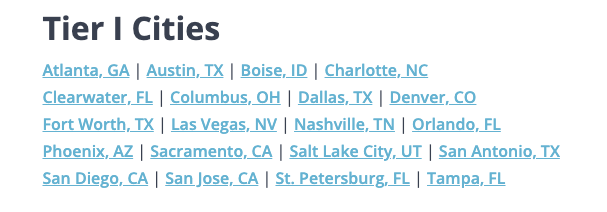

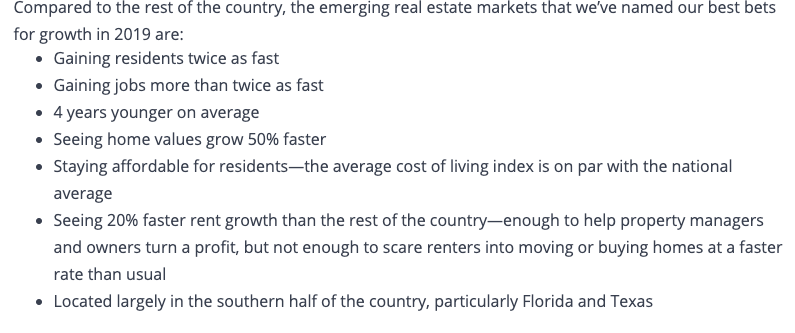

Source: https://www.buildium.com/blog/up-and-coming-real-estate-markets-2019/

In [10]:
# display(data.loc[:,['RegionName','City','State','Metro','t_growth','growth2']].sort_values('growth2',ascending=False).head(40))



### San Jose, CA

San Jose, CA one of 20 tier 1 cities to watch in 2019 and supplemented with zillow zip code data, post-crash growth since 2011.

In [11]:
SanJose = data.loc[(data['Metro'] == 'San Jose')]
display(SanJose[['City','State','Metro','RegionName','t_growth','growth2']].sort_values('growth2',ascending=False).head(5))
# display(SanJose[['City','State','Metro','RegionName','t_growth','growth2']].sort_values('growth2',ascending=False).tail(10))


,City,State,Metro,RegionName,t_growth,growth2
5328,Sunnyvale,CA,San Jose,94089,4.840271,1.937196
2580,Mountain View,CA,San Jose,94043,6.113130,1.867468
5738,Palo Alto,CA,San Jose,94301,5.791261,1.813664
2054,Palo Alto,CA,San Jose,94303,6.304034,1.805727
582,Sunnyvale,CA,San Jose,94086,5.207474,1.682818


Text(0, 0.5, 'Growth percentage')

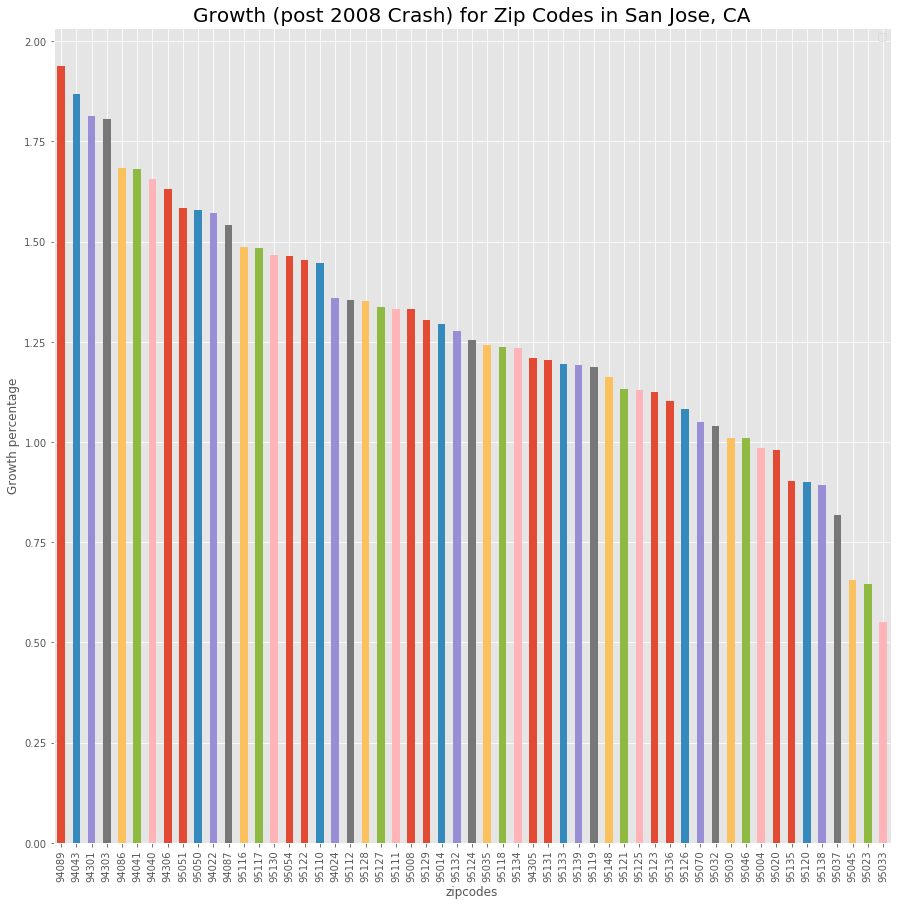

In [12]:
#SanJose.plot.bar(x='RegionName', y='growth2', figsize=(15,15))

# SanJose.groupby(['RegionName'])['price'].mean().sort_values().plot(kind='barh', figsize=(15,15))
# SanJose[['RegionName','growth2']].sort_values(by='growth2',ascending=False).plot(kind='bar',figsize=(15,15))
SanJose[['RegionName','growth2']].sort_values(by='growth2',ascending=False).plot.bar(x='RegionName', y='growth2',figsize=(15,15))
plt.title('Growth (post 2008 Crash) for Zip Codes in San Jose, CA', fontsize=20)
plt.legend('')
plt.xlabel('zipcodes')
plt.ylabel('Growth percentage')

In [17]:
Sunnyvale = data.loc[(data['RegionName'] == '94089')]
display(Sunnyvale[['City','State','Metro','RegionName','t_growth']])

MountainView = data.loc[(data['RegionName'] == '94043')]
display(MountainView[['City','State','Metro','RegionName','t_growth']])

PaloAlto301 = data.loc[(data['RegionName'] == '94301')]
display(PaloAlto301[['City','State','Metro','RegionName','t_growth']])

PaloAlto303 = data.loc[(data['RegionName'] == '94303')]
display(PaloAlto303[['City','State','Metro','RegionName','t_growth']])

,City,State,Metro,RegionName,t_growth
5328,Sunnyvale,CA,San Jose,94089,4.840271


,City,State,Metro,RegionName,t_growth
2580,Mountain View,CA,San Jose,94043,6.11313


,City,State,Metro,RegionName,t_growth
5738,Palo Alto,CA,San Jose,94301,5.791261


,City,State,Metro,RegionName,t_growth
2054,Palo Alto,CA,San Jose,94303,6.304034


### Las Vegas, NV

Las Vegas, NV one of 20 tier 1 cities to watch in 2019 and supplemented with zillow zip code data, post-crash growth since 2011

In [18]:
LasVegas = data.loc[(data['Metro'] == 'Las Vegas')]
display(LasVegas[['City','State','Metro','RegionName','t_growth','growth2']].sort_values('growth2',ascending=False).head())


,City,State,Metro,RegionName,t_growth,growth2
433,Las Vegas,NV,Las Vegas,89110,1.052192,1.719225
815,Las Vegas,NV,Las Vegas,89115,0.902703,1.682927
2934,Las Vegas,NV,Las Vegas,89107,1.125677,1.602122
1960,Las Vegas,NV,Las Vegas,89104,1.199367,1.590062
115,Las Vegas,NV,Las Vegas,89108,1.041951,1.445093


Text(0, 0.5, 'Growth percentage')

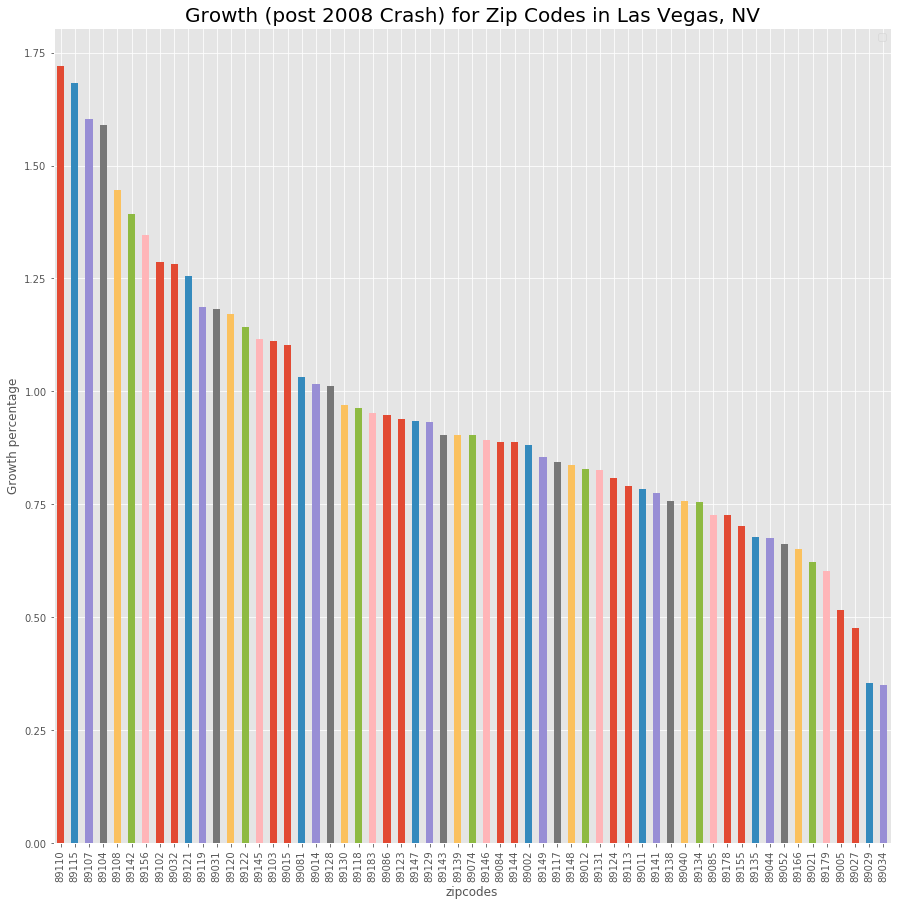

In [19]:
LasVegas[['RegionName','growth2']].sort_values(by='growth2',ascending=False).plot.bar(x='RegionName', y='growth2',figsize=(15,15))
plt.title('Growth (post 2008 Crash) for Zip Codes in Las Vegas, NV', fontsize=20)
plt.legend('')
plt.xlabel('zipcodes')
plt.ylabel('Growth percentage')

In [20]:
LasVegas10 = data.loc[(data['RegionName'] == '89110')]
display(LasVegas10[['City','State','Metro','RegionName','t_growth']])

LasVegas15 = data.loc[(data['RegionName'] == '89115')]
display(LasVegas15[['City','State','Metro','RegionName','t_growth']])

LasVegas07 = data.loc[(data['RegionName'] == '89107')]
display(LasVegas07[['City','State','Metro','RegionName','t_growth']])

LasVegas04 = data.loc[(data['RegionName'] == '89104')]
display(LasVegas04[['City','State','Metro','RegionName','t_growth']])

,City,State,Metro,RegionName,t_growth
433,Las Vegas,NV,Las Vegas,89110,1.052192


,City,State,Metro,RegionName,t_growth
815,Las Vegas,NV,Las Vegas,89115,0.902703


,City,State,Metro,RegionName,t_growth
2934,Las Vegas,NV,Las Vegas,89107,1.125677


,City,State,Metro,RegionName,t_growth
1960,Las Vegas,NV,Las Vegas,89104,1.199367


In [21]:
Phoenix = data.loc[(data['State'] == 'AZ')]
display(Phoenix[['City','State','Metro','RegionName','t_growth','growth2']].sort_values('growth2',ascending=False).head())



,City,State,Metro,RegionName,t_growth,growth2
474,Phoenix,AZ,Phoenix,85008,2.620130,1.896104
3951,El Mirage,AZ,Phoenix,85335,0.979809,1.623944
1658,Phoenix,AZ,Phoenix,85015,2.308357,1.568233
2170,Phoenix,AZ,Phoenix,85042,1.704787,1.520446
1180,Phoenix,AZ,Phoenix,85041,1.656338,1.514667


Text(0, 0.5, 'Growth percentage')

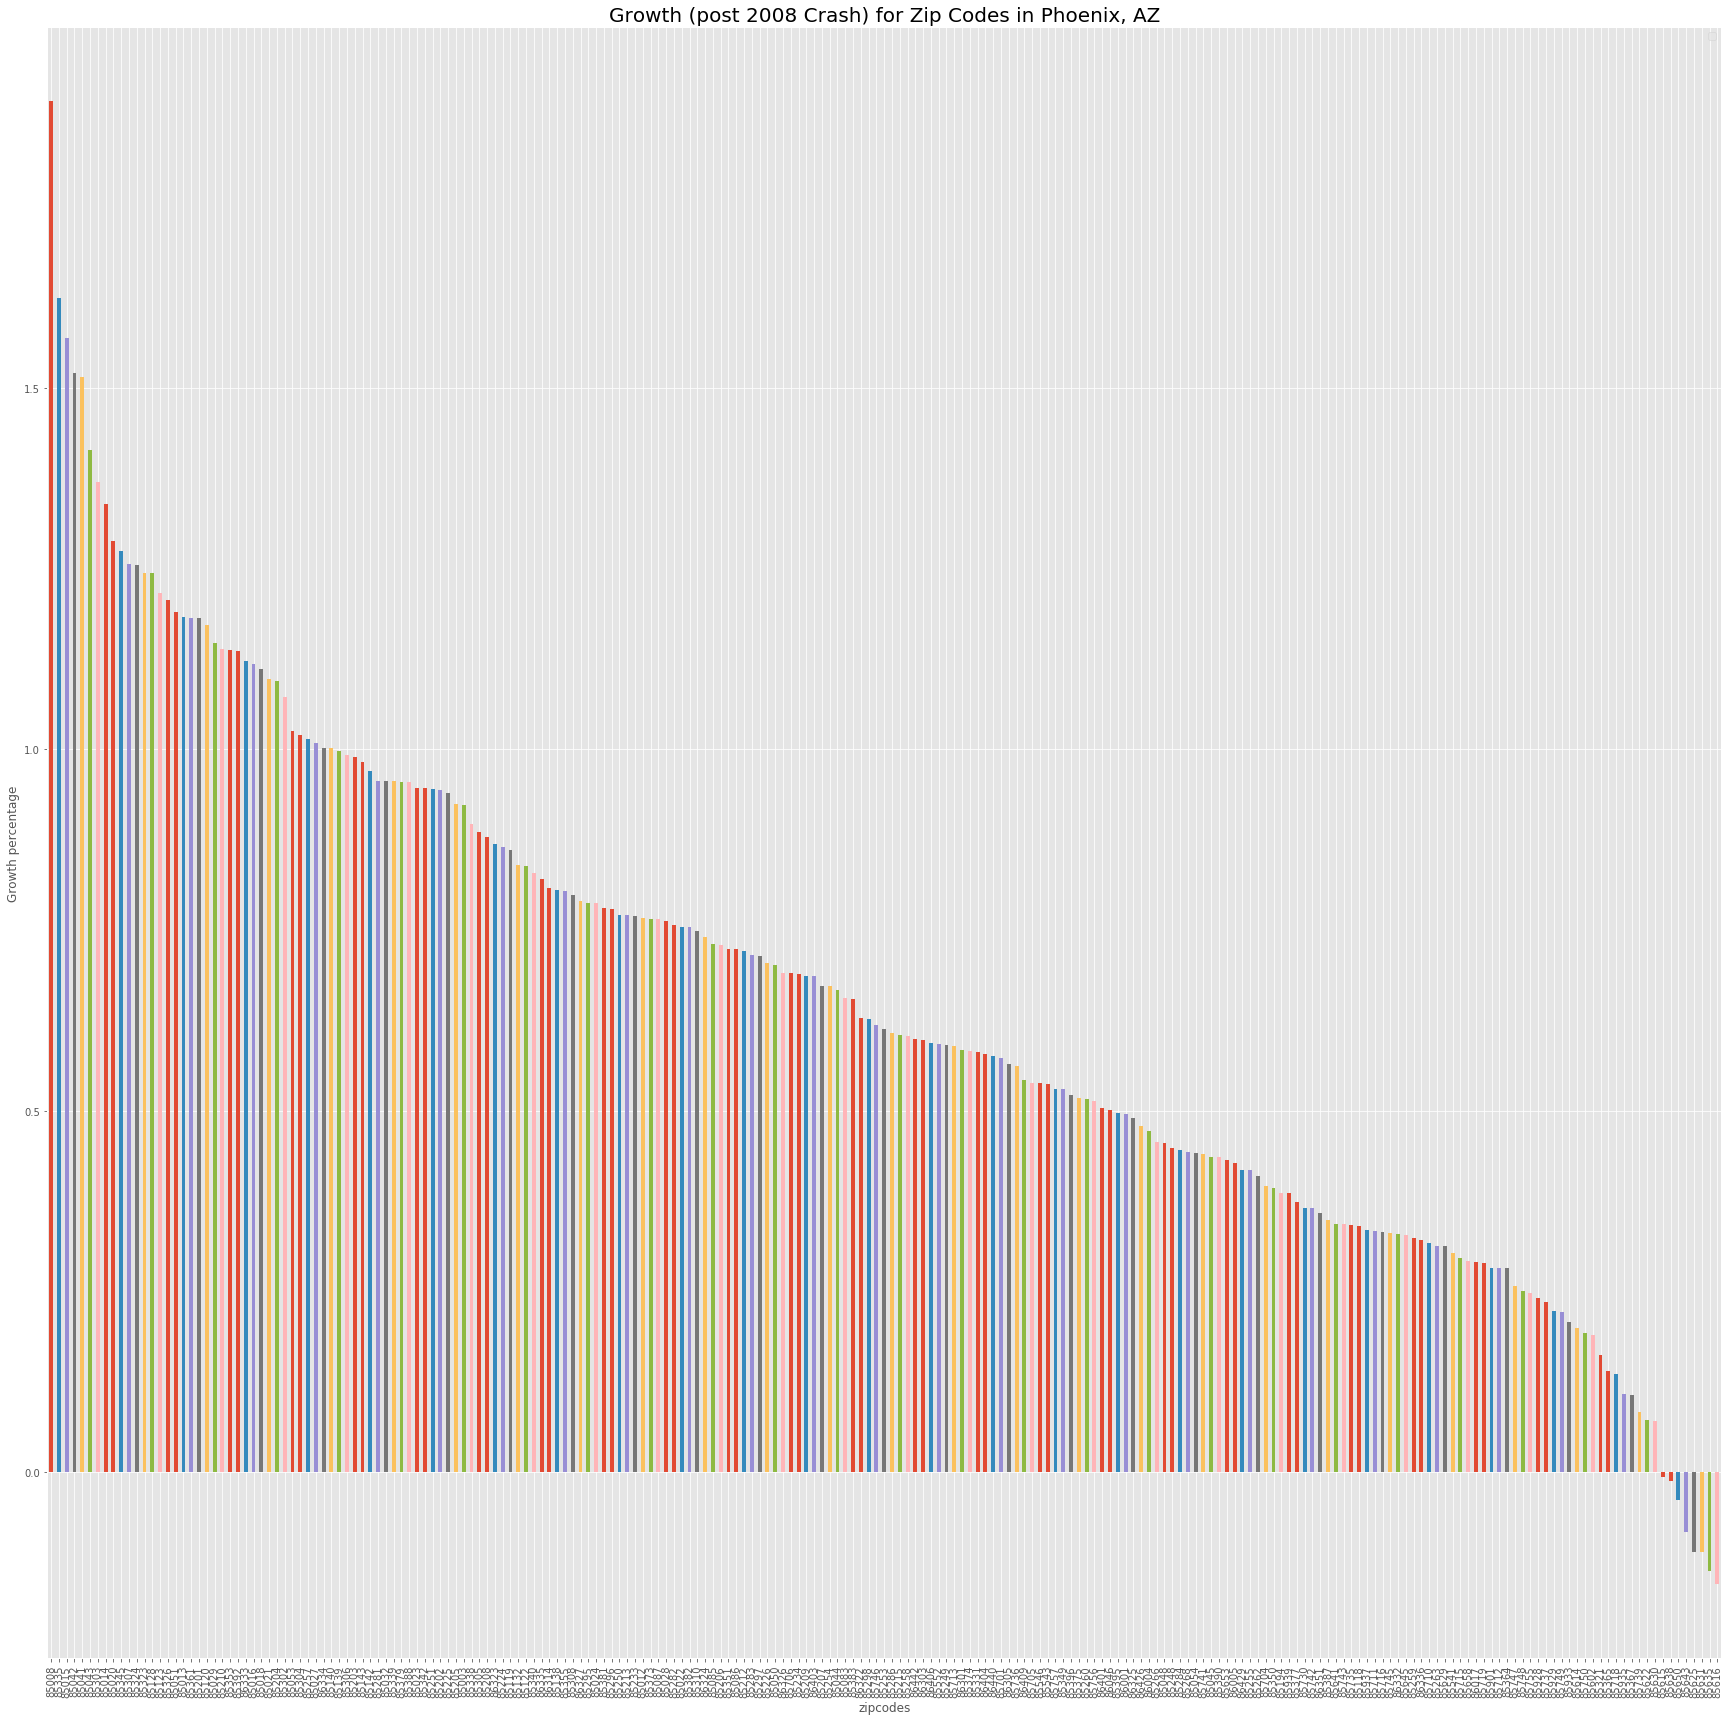

In [30]:
Phoenix[['RegionName','growth2']].sort_values(by='growth2',ascending=False).plot.bar(x='RegionName', y='growth2',figsize=(30,30))
plt.title('Growth (post 2008 Crash) for Zip Codes in Phoenix, AZ', fontsize=20)
plt.legend('')
plt.xlabel('zipcodes')
plt.ylabel('Growth percentage')

In [23]:
Phoenix008 = data.loc[(data['RegionName'] == '85008')]
display(Phoenix008[['City','State','Metro','RegionName']])

ElMirage = data.loc[(data['RegionName'] == '85335')]
display(ElMirage[['City','State','Metro','RegionName']])

Phoenix015 = data.loc[(data['RegionName'] == '85015')]
display(Phoenix015[['City','State','Metro','RegionName']])

Phoenix042 = data.loc[(data['RegionName'] == '85042')]
display(Phoenix042[['City','State','Metro','RegionName']])

Phoenix041 = data.loc[(data['RegionName'] == '85041')]
display(Phoenix041[['City','State','Metro','RegionName']])

,City,State,Metro,RegionName
474,Phoenix,AZ,Phoenix,85008


,City,State,Metro,RegionName
3951,El Mirage,AZ,Phoenix,85335


,City,State,Metro,RegionName
1658,Phoenix,AZ,Phoenix,85015


,City,State,Metro,RegionName
2170,Phoenix,AZ,Phoenix,85042


,City,State,Metro,RegionName
1180,Phoenix,AZ,Phoenix,85041


In [24]:
frames = [Sunnyvale,MountainView,PaloAlto301,PaloAlto303,LasVegas10,LasVegas15,LasVegas07,LasVegas04,Phoenix008,ElMirage,Phoenix015, Phoenix042,Phoenix041]

result = pd.concat(frames)

Text(0, 0.5, 'Growth percentage')

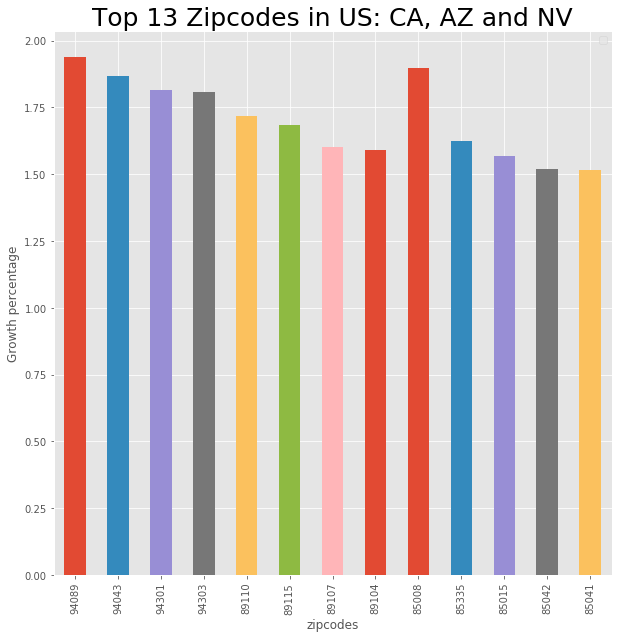

In [29]:
# df.groupby(['zipcode'])['price'].mean().sort_values().plot(kind='barh', figsize=(15,15))
result.plot.bar(x='RegionName', y='growth2', figsize=(10,10))
plt.title('Top 13 Zipcodes in US: CA, AZ and NV', fontsize=25)
plt.xlabel('zipcodes')
plt.legend('')
plt.ylabel('Growth percentage')

# Step 2: Data Preprocessing

In [ ]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:272], format='%Y-%m')

In [ ]:
# time = get_datetimes(data)
# time

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
data.head()
data.drop(['RegionID','SizeRank'],inplace=True,axis=1)

In [ ]:
data.head()

In [ ]:
test = pd.DataFrame()

In [ ]:
test = data[2:3]

In [ ]:
test.head()

In [ ]:
# test.drop(['RegionName','City','State','CountyName','t_growth','growth1','growth2'],inplace=True,axis=1)
# test.head()

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName','t_growth','growth1','growth2'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True,format='%Y-%m')
    melted = melted.dropna(subset=['value'])
    return melted
    #return melted.groupby('time').aggregate({'value':'mean'})

In [ ]:
df = melt_data(test)

In [ ]:
display(df.head())
df.info()

In [ ]:
# df.time = pd.to_datetime(df.time,format='%Y-%m')
# temp_data.Date = pd.to_datetime(temp_data.Date, format='%d/%m/%y')
# pd.to_datetime(df.columns.values[7:272], format='%Y-%m')
# xr['Frequency'] = pd.to_datetime(xr['Frequency'])
# xr.set_index('Frequency', inplace=True)
df.set_index('time',inplace=True)

In [ ]:
df.info()
display(df.head())

In [ ]:
df.drop(df.columns[[0,1,2,3,4,5,6,7]], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.plot(figsize = (16,6));

In [ ]:
test2 = pd.DataFrame()
test2 = data[50:51]
df2 = melt_data(test2)
df2.set_index('time',inplace=True)
df2.drop(df2.columns[[0,1, 2,3,4,5,6,7]], axis=1, inplace=True)
df2.plot(figsize = (16,6));

In [ ]:
test3 = pd.DataFrame()
test3 = data[1150:1151]
df3 = melt_data(test3)
df3.set_index('time',inplace=True)
df3.drop(df3.columns[[0,1, 2,3,4,5,6,7]], axis=1, inplace=True)
df3.plot(figsize = (16,6));

# Step 4b: Stationarity Check

In [ ]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['#Passengers']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

In [ ]:
stationarity_check(data)

# Step 5: ARIMA Modeling

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df3,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [ ]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df3,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

In [ ]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [ ]:
pred = output.get_prediction(start=pd.to_datetime('2018-05-01'), dynamic=False)
pred_conf = pred.conf_int()

In [ ]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = df3['1996-04-01':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('')
plt.legend()

plt.show()

# Step 6: Interpreting Results

# Parking Lot
Code that I do not want to delete

In [ ]:
# IDzip = data.loc[(data['City'] == 'Sherrelwood') & (data['State'] == 'CO')]
# display(IDzip)

In [ ]:
# https://www.housingwire.com/articles/49731-here-are-2019s-10-hottest-zip-codes/

In [ ]:
# MAzip = data.loc[(data['CountyName'] == 'Middlesex') & (data['State'] == 'MA')]
# display(MAzip)
# display(MAzip.growth.sort_values(ascending=False).head(30))
# display(MAzip.sort_values('growth',ascending=False).head(10)) #74 rows
# display(data.growth.head())
# display("null values:",MAzip.growth.isna().sum())
# data.growth.sort_values(ascending=False).head(10)
# display(MAzip['1996-04'].dtype)

In [ ]:
# MAzip['1996-04'] = MAzip.apply(get_datetimes, axis=1)
# MAzip.loc[:,'1996-04':'2018-04'] = MAzip.apply(get_datetimes, axis=1)
#MAzip.loc[:,'1996-04':'2018-04'] = pd.to_datetime(MAzip.loc[:,'1996-04':'2018-04'], format='%Y-%m')
# MAzip['1996-04'] = pd.to_datetime(MAzip['1996-04'], format='%Y-%m')
# MAzip.loc[MAzip['1996-04'] == pd.to_datetime(MAzip['1996-04'], format='%Y-%m')]
#display(MAzip['1996-04'].dtype)